Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

In [1]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn

Usaremos como base de dados o arquivo "exemplo_IA.csv" com os dados usados no exemplo da "aula 9 - video 3 - aprendizado de máquina.pdf".

In [2]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

In [3]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Ensolarado,Quente,Alta,Fraco,Nao
1,Ensolarado,Quente,Alta,Forte,Nao
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvendo,Moderado,Alta,Fraco,Sim
4,Chuvendo,Frio,Normal,Fraco,Sim


In [4]:
# definir o conceito alvo e as features usadas

feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [5]:
Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset
Xone_hot_data.head()

,Outlook_Chuvendo,Outlook_Ensolarado,Outlook_Nublado,Temperature_Frio,Temperature_Moderado,Temperature_Quente,Humidity_Alta,Humidity_Normal,Wind_Forte,Wind_Fraco
0,0,1,0,0,0,1,1,0,0,1
1,0,1,0,0,0,1,1,0,1,0
2,0,0,1,0,0,1,1,0,0,1
3,1,0,0,0,1,0,1,0,0,1
4,1,0,0,1,0,0,0,1,0,1


Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo a entropia:

In [6]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(Xone_hot_data, y)

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

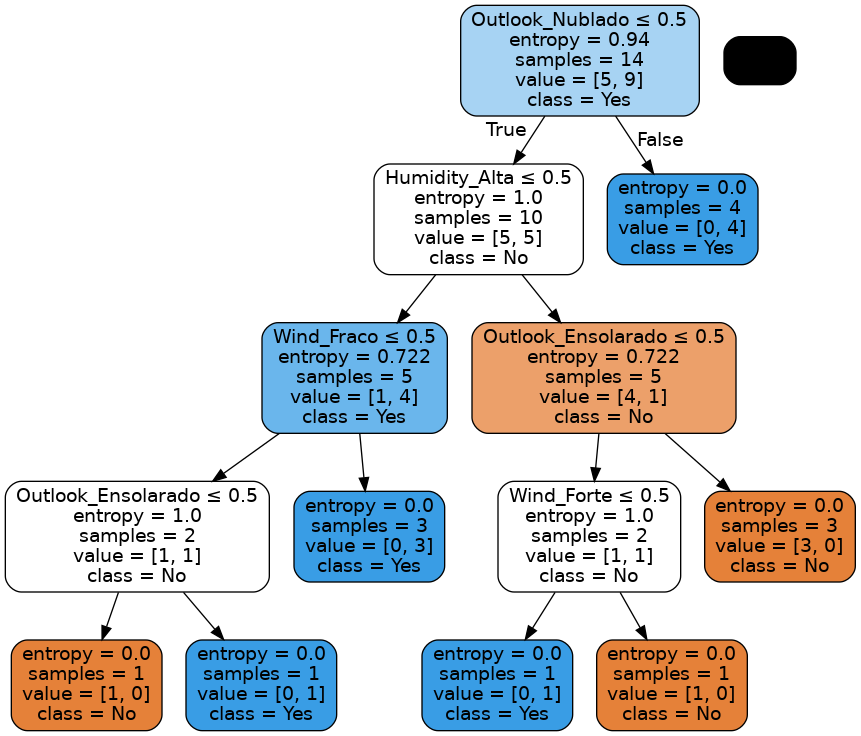

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente. Observe que usamos todas as instâncias disponíveis no treinamento. A acurácia obtida foi 1, indicando que classificamos corretamente todos os exemplos de nosso conjunto.

In [9]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(Xone_hot_data)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0
